In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axis as ax
import numpy as np
from scipy.special import kn, k1, k0
from matplotlib import cm

In [6]:
def r(x,y):
    return np.sqrt(x**2 + y**2)

def Nx(x,y,thetaS):
    return -2*y*np.tan(thetaS/2)/(r(x,y)**2 + (np.tan(thetaS/2))**2)

def Ny(x,y,thetaS):
    return 2*x*np.tan(thetaS/2)/(r(x,y)**2 + (np.tan(thetaS/2))**2)

def Nx_E(x, y, d, r1, thetaS):
    return -(thetaS*y*k1(r(x,y)*d**-1)/(r(x,y)*k1(r1*d**-1)))

def Ny_E(x, y, d, r1, thetaS):
    return (thetaS*x*k1(r(x,y)*d**-1)/(r(x,y)*k1(r1*d**-1)))

def n_perp(x, y, thetaS):
    return np.sqrt(Nx(x, y, thetaS)**2 + Ny(x, y, thetaS)**2)

def nE_perp(x, y, d, r1, thetaS):
    return np.sqrt(Nx_E(x, y, d, r1, thetaS)**2 + Ny_E(x, y, d, r1, thetaS)**2)

def single_f(x, y, thetaS):
    return (8*np.tan(thetaS/2)**6)/(r(x,y)**2 + np.tan(thetaS/2)**2)**4

def simple_f(x, y, d, r1, thetaS):
    return (thetaS**2*(k0(r(x,y)*d**-1)**2 + k1(r(x,y)*d**-1)**2))/(2*k1(r1*d**-1)**2)

In [7]:
xaxis = np.zeros(1000)
yaxis = np.zeros(1000)
x = np.linspace(1, 20, 1000)
y = np.linspace(1, 20, 1000)

thetaS = np.array([0.1, 0.2, 0.3])
d = 2
r1 = 1
dlist = [1,2,3]

labels = ['$\mathregular{\\theta_{s} = \ 0.1}$', '$\mathregular{\\theta_{s} = \ 0.2}$', '$\mathregular{\\theta_{s} = \ 0.3}$']

n, = thetaS.shape # Grabs the shape of the thetaS array
#colors = cm.gist_rainbow(np.linspace(0,1,n)) #assigns colors to each value of thetaS
colors = ['r','g','b']

dlabels = ['d = 1','d = 2','d = 3']

##No field

In [8]:
# This is the single cylinder case with no field
#~ plt.figure(figsize=(10,8))
#~ plt.plot([0], '--k', label='$\mathregular{N_{y}}$') # Allows indicating component line in legend
#~ plt.plot([0], 'k', label='$\mathregular{N_{x}}$')
#~ for i, color, label in zip(thetaS,colors,labels):
	#~ plt.plot(r(x,y), Nx(x,y,i), color=color) # plots the nx solution for each value of thetaS
	#~ plt.plot(r(x,y), Ny(x,y,i), '--', color=color) # same as above for ny
	#~ plt.plot([0], color=color, label=label) # legend indicator for color of thetaS
#~ plt.title('Single Cylinder Case, varied $\mathregular{\\theta_{s}}$', fontsize=18)
#~ plt.xlabel('r', fontsize=14)
#~ plt.ylabel('$\mathregular{N_{x}}$ and $\mathregular{N_{y}}$', fontsize=14)
#~ plt.legend(loc='best')
#~ plt.show()

##E-Field

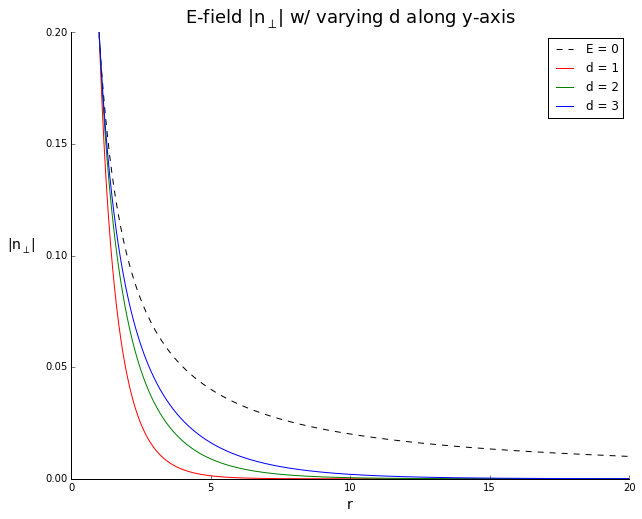

In [9]:
#This is the E-field case with varying d along y-axis
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(r(xaxis,y), n_perp(xaxis,y,0.2), '--k', label='E = 0')
for color, dlabel, dval in zip(colors,dlabels,dlist):
    plt.plot(r(xaxis,y), nE_perp(xaxis,y,dval,r1,0.2), color=color)
    plt.plot([0], color=color, label=dlabel)
plt.title('E-field $\mathregular{|n_{\perp}|}$ w/ varying d along y-axis', fontsize=18,y=1.01)
plt.xlabel('r', fontsize=14)
plt.ylabel('$\mathregular{|n_{\perp}|}$', fontsize=14, rotation='horizontal', labelpad=25)
plt.legend(loc='best')
plt.tick_params(axis='x', top='off')
plt.tick_params(axis='y', right='off');

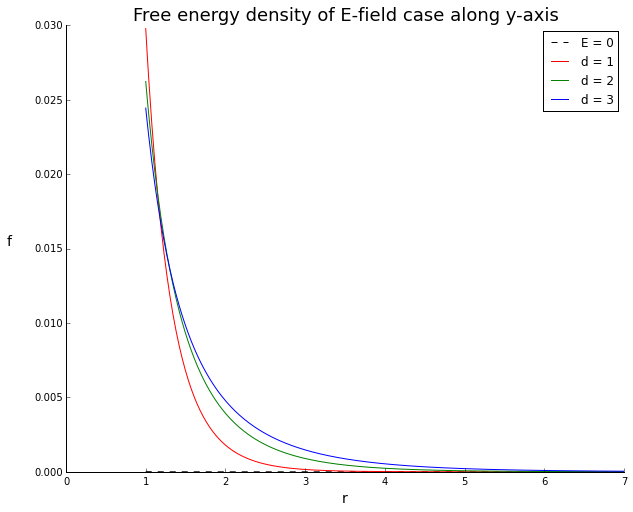

In [10]:
# Free energy density of the E-field case w/ varying d-values, constant thetaS along y-axis
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(r(xaxis,y), single_f(xaxis,y,0.2), '--k', label='E = 0')
for color, dlabel, dval in zip(colors,dlabels,dlist):
    plt.plot(r(xaxis,y), simple_f(xaxis,y,dval,r1,0.2), color=color)
    plt.plot([0], color=color, label=dlabel) # legend indicator for color of thetaS
plt.title('Free energy density of E-field case along y-axis', fontsize=18)
plt.xlabel('r', fontsize=14)
plt.ylabel('f', fontsize=14, rotation='horizontal', labelpad=25)
plt.xlim(0,7)
plt.tick_params(axis='x', top='off')
plt.tick_params(axis='y', right='off')
plt.legend(loc='best');

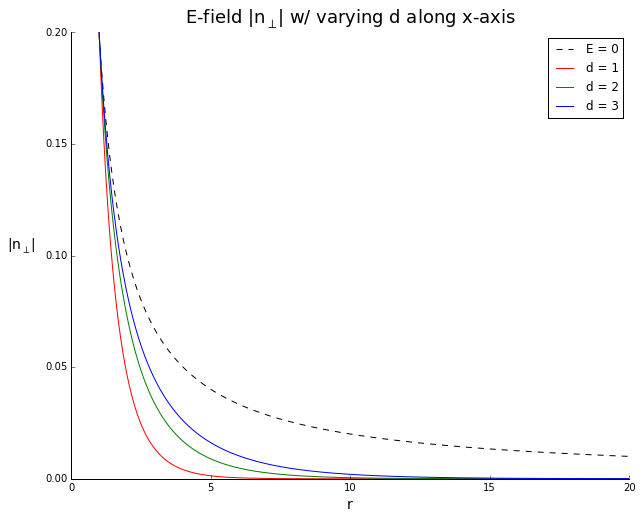

In [11]:
#This is the E-field case with varying d along x-axis
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(r(x,yaxis), n_perp(x,yaxis,0.2), '--k', label='E = 0')
for color, dlabel, dval in zip(colors,dlabels,dlist):
    plt.plot(r(x,yaxis), nE_perp(x,yaxis,dval,r1,0.2), color=color)
    plt.plot([0], color=color, label=dlabel)
plt.title('E-field $\mathregular{|n_{\perp}|}$ w/ varying d along x-axis', fontsize=18,y=1.01)
plt.xlabel('r', fontsize=14)
plt.ylabel('$\mathregular{|n_{\perp}|}$', fontsize=14, rotation='horizontal', labelpad=25)
plt.tick_params(axis='x', top='off')
plt.tick_params(axis='y', right='off')
plt.legend(loc='best');

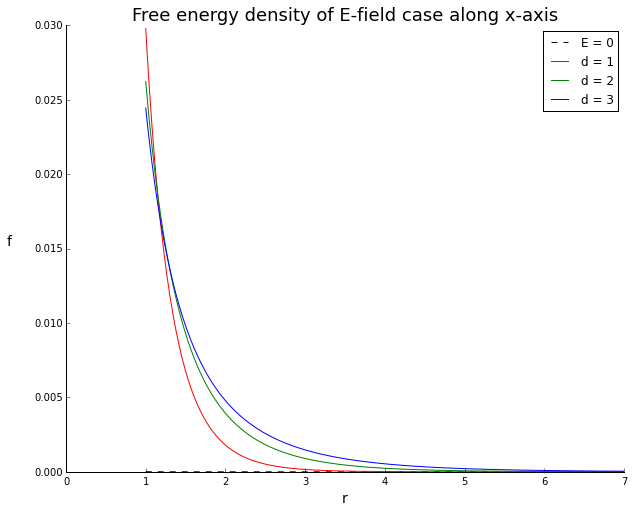

In [12]:
# Free energy density of the E-field case w/ varying d-values, constant thetaS along x-axis
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(r(x,yaxis), single_f(x,yaxis,0.2), '--k', label='E = 0')
for color, dlabel, dval in zip(colors,dlabels,dlist):
    plt.plot(r(x,yaxis), simple_f(x,yaxis,dval,r1,0.2), color=color)
    plt.plot([0], color=color, label=dlabel) # legend indicator for color of thetaS
plt.title('Free energy density of E-field case along x-axis', fontsize=18)
plt.xlabel('r', fontsize=14)
plt.ylabel('f', fontsize=14, rotation='horizontal', labelpad=25)
plt.xlim(0,7)
plt.tick_params(axis='x', top='off')
plt.tick_params(axis='y', right='off')
plt.legend(loc='best');

##Same stuff not along a single axis

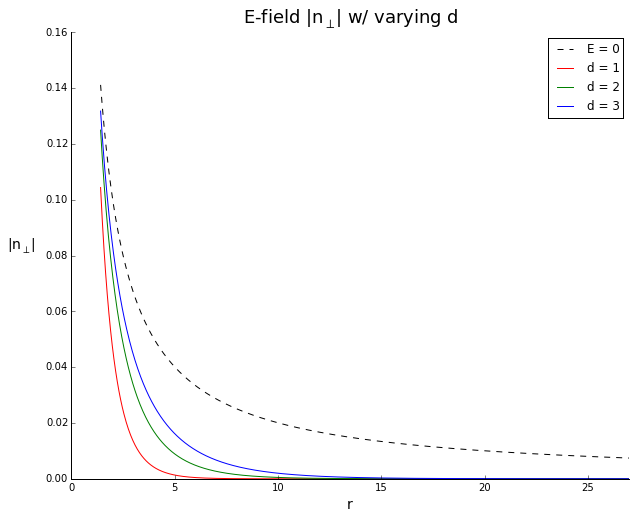

In [16]:
#This is the E-field case with varying d along x-axis
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(r(x,y), n_perp(x,y,0.2), '--k', label='E = 0')
for color, dlabel, dval in zip(colors,dlabels,dlist):
    plt.plot(r(x,y), nE_perp(x,y,dval,r1,0.2), color=color)
    plt.plot([0], color=color, label=dlabel)
plt.title('E-field $\mathregular{|n_{\perp}|}$ w/ varying d', fontsize=18,y=1.01)
plt.xlabel('r', fontsize=14)
plt.ylabel('$\mathregular{|n_{\perp}|}$', fontsize=14, rotation='horizontal', labelpad=25)
plt.tick_params(axis='x', top='off')
plt.tick_params(axis='y', right='off')
plt.xlim(0,27)
plt.legend(loc='best');

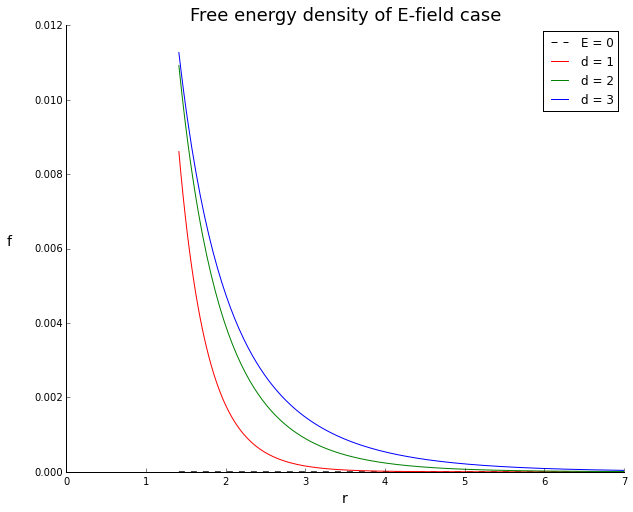

In [17]:
# Free energy density of the E-field case w/ varying d-values, constant thetaS along x-axis
plt.figure(figsize=(10,8))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.plot(r(x,y), single_f(x,y,0.2), '--k', label='E = 0')
for color, dlabel, dval in zip(colors,dlabels,dlist):
    plt.plot(r(x,y), simple_f(x,y,dval,r1,0.2), color=color)
    plt.plot([0], color=color, label=dlabel) # legend indicator for color of thetaS
plt.title('Free energy density of E-field case', fontsize=18)
plt.xlabel('r', fontsize=14)
plt.ylabel('f', fontsize=14, rotation='horizontal', labelpad=25)
plt.xlim(0,7)
plt.tick_params(axis='x', top='off')
plt.tick_params(axis='y', right='off')
plt.legend(loc='best');

#UNUSED CODE

In [13]:
# This is the E-field case with constant d-values
#~ plt.figure(figsize=(10,8))
#~ plt.plot([0], '--k', label='$\mathregular{N_{y}}$')
#~ plt.plot([0], 'k', label='$\mathregular{N_{x}}$')
#~ for i, color, label in zip(thetaS,colors,labels):
	#~ plt.plot(r(x,y), Nx_E(x,y,d,r1,i), color=color)
	#~ plt.plot(r(x,y), Ny_E(x,y,d,r1,i), '--', color=color)
	#~ plt.plot([0], color=color, label=label)
#~ plt.title('E-field Case w/ constant d', fontsize=18)
#~ plt.xlabel('r', fontsize=14)
#~ plt.ylabel('$\mathregular{N_{x}}$ and $\mathregular{N_{y}}$', fontsize=14)
#~ plt.xlim(0,15)
#~ plt.legend(loc='best')
#~ plt.show()

# Free energy density of the E-field case w/ constant d-values
#~ plt.figure(figsize=(10,8))
#~ for i, color, label in zip(thetaS,colors,labels):
	#~ plt.plot(r(x,y), simple_f(x, y, d, r1,i), color=color)
	#~ plt.plot([0], color=color, label=label) # legend indicator for color of thetaS
#~ plt.title('Free energy density of E-field case, constant d', fontsize=18)
#~ plt.xlabel('r', fontsize=14)
#~ plt.ylabel('f', fontsize=14)
#~ plt.xlim(0,7)
#~ plt.legend(loc='best')
#~ plt.show()